In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score,f1_score
from sklearn.linear_model import LinearRegression

In [2]:
k=pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\Python Tuto\data.csv')
k

,area,age,price
0,3000,5.0,3500000
1,3500,8.0,4000000
2,4000,3.0,5200000
3,4500,NaN,4700000
4,5000,4.0,6700000
5,5500,3.0,7600000


In [3]:
y=k.age.median()
y

4.0

In [4]:
k.age=k.age.fillna(y)
k

,area,age,price
0,3000,5.0,3500000
1,3500,8.0,4000000
2,4000,3.0,5200000
3,4500,4.0,4700000
4,5000,4.0,6700000
5,5500,3.0,7600000


Text(0, 0.5, 'price')

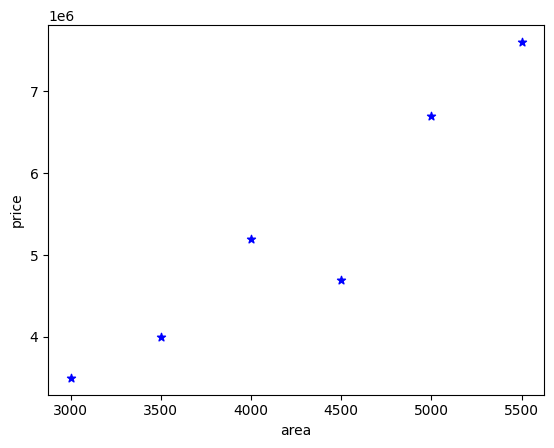

In [5]:
plt.scatter(k['area'],k['price'],color='blue',marker='*')
plt.xlabel('area')
plt.ylabel('price')

In [6]:
reg=LinearRegression()
reg.fit(k[['area','age']],k['price'],)
reg

LinearRegression()

In [7]:
x=[4000,8]
reg.predict([x])

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4676190.47619048])

In [8]:
m=reg.coef_
m

array([  1528.57142857, -64285.71428571])

In [9]:
c=reg.intercept_
c

-923809.5238095215

In [10]:
y=m[0]*x[0]+m[1]*x[1]+c
y

4676190.476190476

In [11]:
k1=pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\Python Tuto\Book1.csv')
k1

,exp,t_s,i_s,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
k1.exp=k1.exp.fillna('zero')
m=k1.t_s.median()
k1.t_s=k1.t_s.fillna(m)

In [17]:
m5=k1['exp']
m5

0         0
1         0
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: exp, dtype: object

In [19]:
from word2number import w2n

In [22]:
k1['exp']=k1['exp'].apply(lambda x:w2n.word_to_num(x) if isinstance(x, str) else 0)

In [23]:
k1

,exp,t_s,i_s,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [25]:
reg1=LinearRegression()
reg1.fit(k1[['exp','t_s','i_s']],k1.salary)
reg1

LinearRegression()

In [35]:
x1=[2,8,9]
reg1.predict([x])

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57975.98253275])

In [32]:
m1=reg1.coef_
print(len(m1))
m1

3


array([2812.95487627, 1845.70596798, 2205.24017467])

In [33]:
c1=reg1.intercept_
c1

17737.263464337688

In [36]:
su=0
for i in range(len(x1)):
    su+=(m1[i]*x1[i])
y=su+c1
print(y)

57975.98253275109


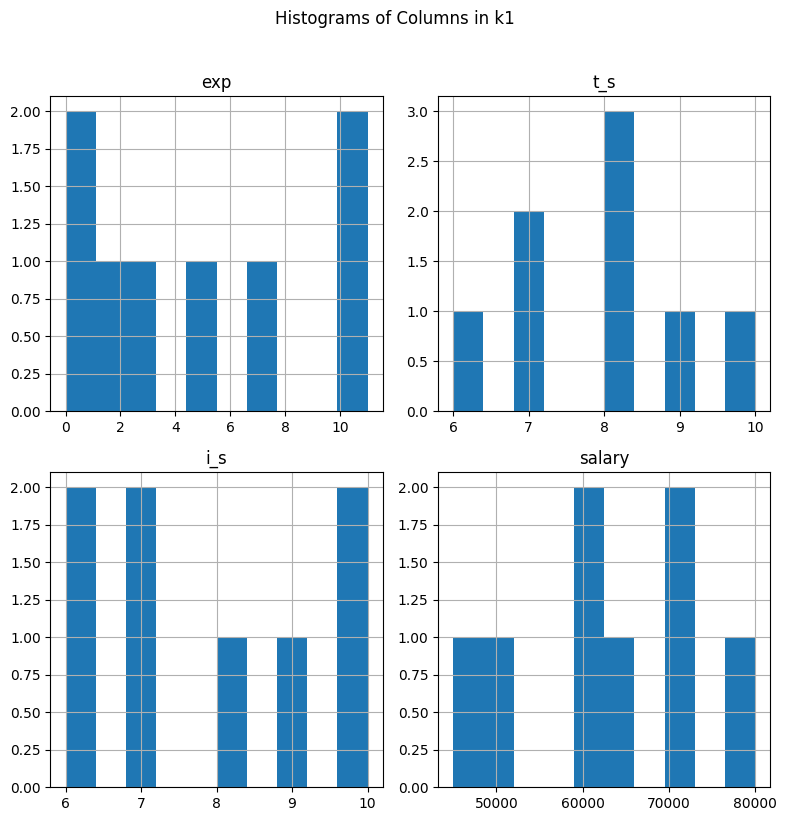

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the provided data
data = {
    'exp': [0, 0, 5, 2, 7, 3, 10, 11],
    't_s': [8.0, 8.0, 6.0, 10.0, 9.0, 7.0, 8.0, 7.0],
    'i_s': [9, 6, 7, 10, 6, 10, 7, 8],
    'salary': [50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]
}

k1 = pd.DataFrame(data)

# Plot histograms for each column
k1.hist(figsize=(8,8))  # Adjust the figsize as needed
plt.suptitle('Histograms of Columns in k1', y=1.02)  # Title above the subplots
plt.tight_layout()  # To avoid overlapping labels
plt.show()